In [37]:
# ================================================================
# BOOTSTRAP CELL FOR Knowledge_Graph.ipynb
# Ensures ALL required variables, artifacts, and dependencies exist
# ================================================================

# Install missing packages
!pip install langdetect networkx pyvis scikit-learn pandas numpy matplotlib --quiet

# Imports
import os, json, re
import pandas as pd
import numpy as np
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0
import joblib

# ------------------------------
# 1. Load ML Model
# ------------------------------
model_path = "/content/drive/MyDrive/Colab Notebooks/Model Notebooks/model_artifacts/child_disease_random_forest.pkl"
rf_model = joblib.load(model_path)

# ------------------------------
# 2. Load NLP artifacts
# ------------------------------
artifact_path = "/content/drive/MyDrive/Colab Notebooks/Model Notebooks/artifacts/"

with open(artifact_path + "symptom_map.json", "r", encoding="utf-8") as f:
    symptom_map = json.load(f)

with open(artifact_path + "keyword_lookup.json", "r", encoding="utf-8") as f:
    keyword_lookup = json.load(f)

# ------------------------------
# 3. Define diseases and danger signs
# ------------------------------
diseases = ["pneumonia", "malaria", "diarrhea"]

danger_signs = [
    "convulsions", "chest_indrawing", "unable_to_feed",
    "vomiting_everything", "lethargic"
]

# ------------------------------
# 4. Ensure symptoms_to_features exists
# ------------------------------
def symptoms_to_features(symptom_dict, metadata=None):
    age = metadata.get("age_years", 2) if metadata else 2
    duration = metadata.get("duration_days", 1) if metadata else 1

    # IMPORTANT: Feature order MUST match classifier training order
    return [
        int(symptom_dict.get("fever", False)),
        int(symptom_dict.get("cough", False)),
        int(symptom_dict.get("fast_breathing", False)),
        int(symptom_dict.get("diarrhea", False)),
        int(symptom_dict.get("vomiting", False)),
        int(symptom_dict.get("weakness", False)),
        int(symptom_dict.get("poor_feeding", False)),
        int(symptom_dict.get("convulsions", False)),
        age,
        duration,
    ]

print("BOOTSTRAP OK — Model, NLP artifacts, diseases, danger signs, and feature converter loaded.")


BOOTSTRAP OK — Model, NLP artifacts, diseases, danger signs, and feature converter loaded.


# **Knowledge Graph Reasoning Engine **
### Notebook: Knowledge_Graph.ipynb
### Cognitive Agent: VHT Childhood Disease Assistant

This notebook builds a medical Knowledge Graph (KG) that encodes IMCI-based
clinical reasoning and symptom-disease relationships. The KG allows the system
to provide structured reasoning, interpretability, and transparent diagnosis
logic.

The KG complements the classifier by:
- Reinforcing rule-based patterns (e.g., cough + fast breathing → pneumonia)
- Providing human-readable explanations
- Flagging danger signs (e.g., convulsions, chest indrawing)
- Adjusting confidence levels
- Supporting ethical, interpretable AI


## **Install & Import Required Libraries**

We use:
- **networkx** for graph structure and reasoning
- **matplotlib** for optional visualization


In [1]:
!pip install networkx

import networkx as nx
import matplotlib.pyplot as plt


## **Create Knowledge Graph Structure**

We build a directed graph where:

- **Symptoms** → point to **Diseases**
- **Danger signs** → point to **Severe Disease states**
- **Metadata rules** → influence disease probability
- **Edges** have strengths (weights) showing how strongly a symptom contributes

We will build nodes for:
- Symptoms
- Diseases
- Danger signs
- Risk levels


In [2]:
G = nx.DiGraph()  # directed graph


## **Add Symptom and Disease Nodes**

We classify nodes by type:
- symptom
- disease
- danger_sign
- risk_level

This helps the reasoning engine treat them differently.


In [3]:
# Diseases
diseases = ["pneumonia", "malaria", "diarrhea"]

for d in diseases:
    G.add_node(d, type="disease")

# Symptoms
symptoms = [
    "fever", "cough", "fast_breathing", "difficulty_breathing",
    "diarrhea", "vomiting", "weakness", "poor_feeding", "convulsions",
    "blood_in_stool"
]

for s in symptoms:
    G.add_node(s, type="symptom")

# Danger signs
danger_signs = [
    "convulsions", "chest_indrawing", "unable_to_feed",
    "vomiting_everything", "lethargic"
]

for ds in danger_signs:
    G.add_node(ds, type="danger_sign")


In [4]:
# Pneumonia
G.add_edge("fast_breathing", "pneumonia", weight=0.9)
G.add_edge("cough", "pneumonia", weight=0.7)
G.add_edge("fever", "pneumonia", weight=0.4)

# Malaria
G.add_edge("fever", "malaria", weight=0.8)
G.add_edge("vomiting", "malaria", weight=0.6)
G.add_edge("weakness", "malaria", weight=0.5)

# Diarrhea
G.add_edge("diarrhea", "diarrhea", weight=0.9)
G.add_edge("vomiting", "diarrhea", weight=0.5)
G.add_edge("fever", "diarrhea", weight=0.3)


## **Add Danger Sign Rules**

According to IMCI:
- Convulsions → severe illness
- Chest indrawing → severe pneumonia
- Unable to feed → severe illness
- Vomiting everything → dehydration emergency

We encode these as edges to **risk_level** nodes.


In [5]:
G.add_node("high_risk", type="risk_level")
G.add_node("moderate_risk", type="risk_level")

G.add_edge("convulsions", "high_risk", weight=1.0)
G.add_edge("chest_indrawing", "high_risk", weight=1.0)
G.add_edge("unable_to_feed", "high_risk", weight=0.9)
G.add_edge("vomiting_everything", "high_risk", weight=0.9)


# **Knowledge Graph Reasoning Engine**  
### Notebook: Knowledge_Graph.ipynb  
### Cognitive Agent: VHT Childhood Disease Assistant

This notebook builds a medical Knowledge Graph (KG) that encodes IMCI-based
clinical reasoning and symptom–disease relationships.

The KG allows:
- Symbolic reasoning
- Danger sign detection
- Explainable AI
- Hybrid reasoning (ML + KG)
- Clinical rule enforcement

This notebook will be integrated with the NLP engine and ML classifier.


In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
!pip install networkx

import networkx as nx
import matplotlib.pyplot as plt


In [8]:
G = nx.DiGraph()   # Directed Knowledge Graph


## **Step 1: Add Nodes to the Knowledge Graph**  
We add nodes for:  
- Symptoms  
- Diseases  
- Danger signs  
- Risk levels  
Each node has a type attribute so the system can treat them differently.


In [9]:
# Diseases
diseases = ["pneumonia", "malaria", "diarrhea"]
for d in diseases:
    G.add_node(d, type="disease")

# Symptoms
symptoms = [
    "fever", "cough", "fast_breathing", "difficulty_breathing",
    "diarrhea", "vomiting", "weakness", "poor_feeding",
    "convulsions", "blood_in_stool"
]
for s in symptoms:
    G.add_node(s, type="symptom")

# Danger signs (IMCI severe illness indicators)
danger_signs = [
    "convulsions", "chest_indrawing", "unable_to_feed",
    "vomiting_everything", "lethargic"
]
for ds in danger_signs:
    G.add_node(ds, type="danger_sign")

# Risk levels
risk_levels = ["low_risk", "moderate_risk", "high_risk"]
for rl in risk_levels:
    G.add_node(rl, type="risk_level")


## **Step 2: Add Symptom → Disease Edges**  
We now add medical relationships based on IMCI guidelines.

Each edge has a **weight**, representing the strength of association.


In [10]:
# Pneumonia associations
G.add_edge("fast_breathing", "pneumonia", weight=0.9)
G.add_edge("cough", "pneumonia", weight=0.7)
G.add_edge("fever", "pneumonia", weight=0.4)

# Malaria associations
G.add_edge("fever", "malaria", weight=0.8)
G.add_edge("vomiting", "malaria", weight=0.6)
G.add_edge("weakness", "malaria", weight=0.5)

# Diarrhea associations
G.add_edge("diarrhea", "diarrhea", weight=0.9)
G.add_edge("vomiting", "diarrhea", weight=0.5)
G.add_edge("fever", "diarrhea", weight=0.3)


## **Step 3: Add Danger Sign → High Risk Edges**  
According to IMCI, the following symptoms indicate severe illness requiring urgent referral.


In [11]:
# Danger sign -> high risk classification
G.add_edge("convulsions", "high_risk", weight=1.0)
G.add_edge("chest_indrawing", "high_risk", weight=1.0)
G.add_edge("unable_to_feed", "high_risk", weight=0.9)
G.add_edge("vomiting_everything", "high_risk", weight=0.9)
G.add_edge("lethargic", "high_risk", weight=0.95)


## **Step 4: Build Knowledge Graph Reasoning Function**

This function takes symptom detections from the NLP engine and computes:

- Disease scores based on KG weights  
- Danger sign detection  
- Risk level classification  
- Explanation of which rules were activated  

This forms the symbolic reasoning part of the cognitive agent.


In [12]:
def kg_reasoning(symptom_dict):
    """
    Takes a dictionary of symptoms (True/False)
    and returns:
    - disease scores based on KG edges
    - detected danger signs
    - risk level
    - explanation of activated rules
    """

    disease_scores = {d: 0 for d in diseases}
    explanations = []
    danger_hits = []

    # Evaluate symptoms in the KG
    for symptom, present in symptom_dict.items():
        if present and symptom in G.nodes:
            for _, disease, data in G.out_edges(symptom, data=True):
                weight = data.get("weight", 0)
                disease_scores[disease] += weight
                explanations.append(f"{symptom} → {disease} (weight {weight})")

    # Check danger signs separately
    for ds in danger_signs:
        if symptom_dict.get(ds, False):
            danger_hits.append(ds)

    # Assign risk level
    if danger_hits:
        risk = "high_risk"
        explanations.append("Danger signs detected → HIGH RISK classification")
    else:
        # moderate if scores are mid-range
        if max(disease_scores.values()) >= 0.7:
            risk = "moderate_risk"
        else:
            risk = "low_risk"

    return disease_scores, danger_hits, risk, explanations


## **Step 5: Hybrid Reasoning (KG + Classifier)**

This function combines:
1. Machine Learning classifier probabilities  
2. Knowledge Graph disease weights  
3. Danger sign logic  
4. Rule-based explanations  

The hybrid engine produces:
- A final disease prediction  
- A final risk level  
- A merged explanation combining statistical + symbolic reasoning  

This is the core of the cognitive reasoning system.


In [13]:
import joblib
import json

model_path = "/content/drive/MyDrive/Colab Notebooks/Model Notebooks/model_artifacts/child_disease_random_forest.pkl"
nlp_artifacts_path = "/content/drive/MyDrive/Colab Notebooks/Model Notebooks/artifacts/"

rf_model = joblib.load(model_path)

with open(nlp_artifacts_path + "symptom_map.json", "r") as f:
    symptom_map = json.load(f)

with open(nlp_artifacts_path + "keyword_lookup.json", "r") as f:
    keyword_lookup = json.load(f)

print("Classifier and NLP artifacts loaded!")


Classifier and NLP artifacts loaded!


In [14]:
def symptoms_to_features(symptom_dict, metadata=None):
    # Default metadata if missing
    age = metadata.get("age_years", 2) if metadata else 2
    duration = metadata.get("duration_days", 1) if metadata else 1

    feature_vector = [
        int(symptom_dict.get("fever", False)),
        int(symptom_dict.get("cough", False)),
        int(symptom_dict.get("fast_breathing", False)),
        int(symptom_dict.get("diarrhea", False)),
        int(symptom_dict.get("vomiting", False)),
        int(symptom_dict.get("weakness", False)),
        int(symptom_dict.get("poor_feeding", False)),
        int(symptom_dict.get("convulsions", False)),
        age,
        duration
    ]

    return feature_vector


In [15]:
def hybrid_reasoning(symptom_dict, metadata, classifier_model):
    """
    Combines KG reasoning, classifier probabilities,
    and danger sign detection into one final decision.
    """

    # --- 1. KG symbolic scoring ---
    kg_scores, danger_signs, risk_level, kg_explanations = kg_reasoning(symptom_dict)

    # --- 2. ML classifier prediction ---
    feature_vector = symptoms_to_features(symptom_dict, metadata)
    clf_proba = classifier_model.predict_proba([feature_vector])[0]
    clf_labels = classifier_model.classes_

    classifier_dict = {label: prob for label, prob in zip(clf_labels, clf_proba)}

    # --- 3. Combine scores (weighted hybrid fusion) ---
    final_scores = {}

    for disease in diseases:
        # Weighted hybrid scoring formula:
        # 70% classifier + 30% knowledge graph
        final_scores[disease] = (classifier_dict[disease] * 0.7) + (kg_scores[disease] * 0.3)

    # Choice with maximum combined score
    final_prediction = max(final_scores, key=final_scores.get)

    # --- 4. Build final explanation ---
    explanation = []

    explanation.append("Classification Probabilities:")
    for d, p in classifier_dict.items():
        explanation.append(f" - {d}: {p*100:.1f}%")

    explanation.append("\nKnowledge Graph Reasoning:")
    for rule in kg_explanations:
        explanation.append(" - " + rule)

    explanation.append("\nHybrid Final Scores:")
    for d, s in final_scores.items():
        explanation.append(f" - {d}: {s:.3f}")

    explanation.append(f"\nFinal Decision → {final_prediction.upper()}")
    explanation.append(f"Risk Level → {risk_level.upper()}")

    if danger_signs:
        explanation.append(f"Danger Signs Detected: {', '.join(danger_signs)}")

    return final_prediction, risk_level, explanation


## **Step 6: Test Hybrid Reasoning Engine**

We simulate a real case by providing a set of symptoms extracted from the NLP
module and passing them into the hybrid reasoning engine.

This demonstrates:
- Knowledge Graph reasoning
- Classifier fusion
- Danger sign handling
- Explanation generation


In [16]:
# Simulated input (example extracted from NLP engine)
symptom_input = {
    "fever": True,
    "cough": True,
    "fast_breathing": True,
    "difficulty_breathing": False,
    "diarrhea": False,
    "vomiting": False,
    "weakness": False,
    "poor_feeding": False,
    "convulsions": False,
    "blood_in_stool": False
}

metadata_input = {
    "age_years": 2,
    "duration_days": 2
}

final_prediction, risk_level, explanation = hybrid_reasoning(
    symptom_input,
    metadata_input,
    rf_model
)

print("FINAL PREDICTION:", final_prediction)
print("RISK LEVEL:", risk_level)
print("\n--- EXPLANATION ---")
for line in explanation:
    print(line)


FINAL PREDICTION: pneumonia
RISK LEVEL: moderate_risk

--- EXPLANATION ---
Classification Probabilities:
 - diarrhea: 0.0%
 - malaria: 0.0%
 - pneumonia: 100.0%

Knowledge Graph Reasoning:
 - fever → pneumonia (weight 0.4)
 - fever → malaria (weight 0.8)
 - fever → diarrhea (weight 0.3)
 - cough → pneumonia (weight 0.7)
 - fast_breathing → pneumonia (weight 0.9)

Hybrid Final Scores:
 - pneumonia: 1.300
 - malaria: 0.240
 - diarrhea: 0.090

Final Decision → PNEUMONIA
Risk Level → MODERATE_RISK


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## **Step 7: Visualize the Knowledge Graph**

We now create a dynamic, color-coded graph visualization showing:

- Symptom nodes
- Disease nodes
- Danger sign nodes
- Risk level nodes
- Weighted edges representing medical relationships

This visualization will be used in the final report to demonstrate
the structure of the cognitive reasoning engine.


In [22]:
# Filter out nodes that have no edges
nodes_with_edges = [node for node in G.nodes() if G.degree(node) > 0]

# Create filtered subgraph
G_filtered = G.subgraph(nodes_with_edges).copy()

print("Original graph nodes:", len(G.nodes()))
print("Filtered graph nodes:", len(G_filtered.nodes()))
print("Filtered nodes:", list(G_filtered.nodes()))


Original graph nodes: 19
Filtered graph nodes: 14
Filtered nodes: ['pneumonia', 'malaria', 'diarrhea', 'fever', 'cough', 'fast_breathing', 'vomiting', 'weakness', 'convulsions', 'chest_indrawing', 'unable_to_feed', 'vomiting_everything', 'lethargic', 'high_risk']


In [17]:
# Define color map for different node types
color_map = {
    "symptom": "#1f78b4",        # blue
    "disease": "#33a02c",        # green
    "danger_sign": "#e31a1c",    # red
    "risk_level": "#ff7f00"      # orange
}

# Generate colors for nodes
node_colors = []
node_sizes = []

for node, data in G.nodes(data=True):
    node_type = data.get("type", "symptom")
    node_colors.append(color_map[node_type])

    # Customize sizes (danger signs larger)
    if node_type == "disease":
        node_sizes.append(1500)
    elif node_type == "danger_sign":
        node_sizes.append(1800)
    elif node_type == "risk_level":
        node_sizes.append(1500)
    else:
        node_sizes.append(900)


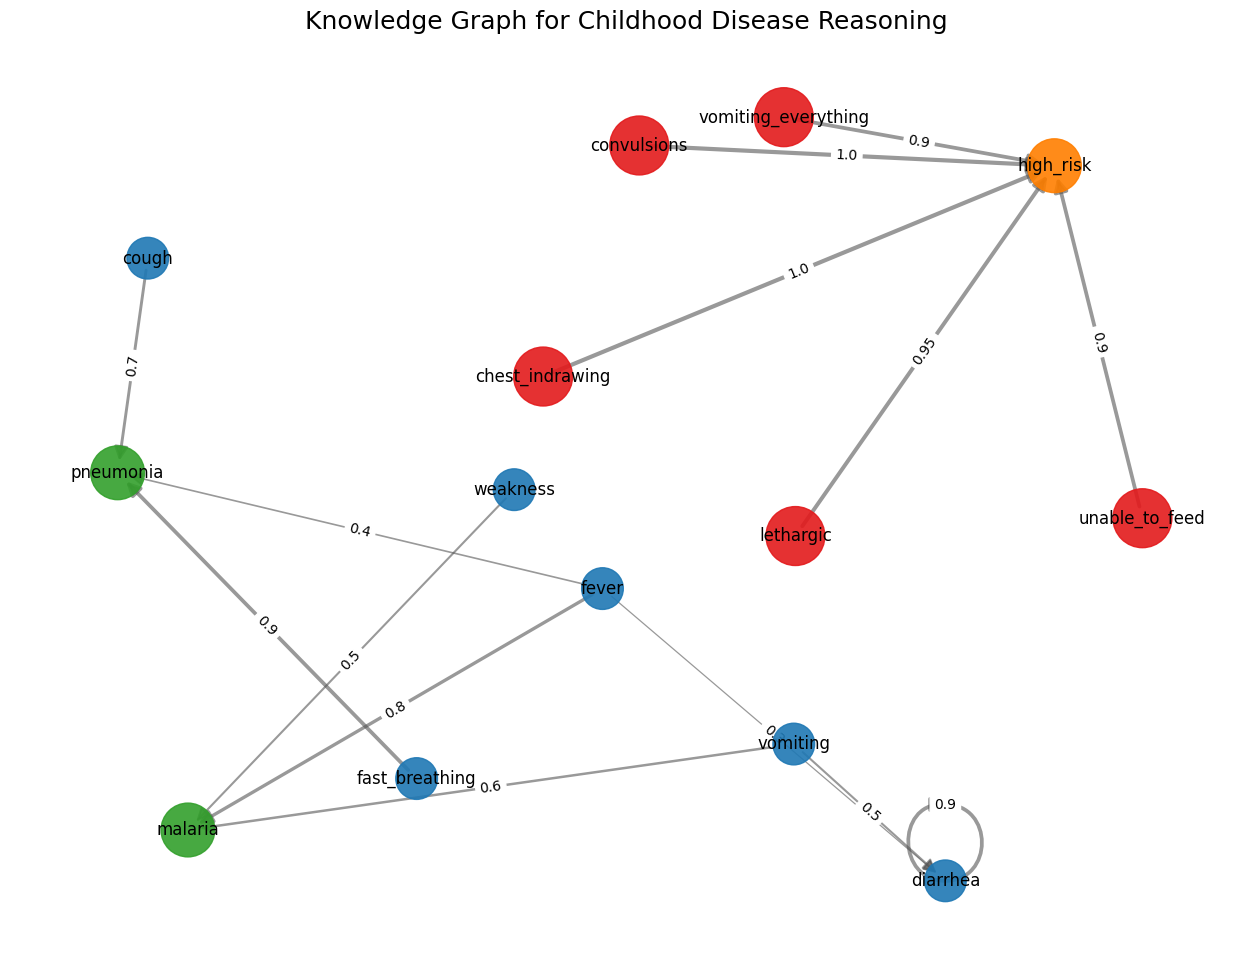

In [24]:
# Generate colors and sizes for the filtered graph
node_colors = []
node_sizes = []

for node, data in G_filtered.nodes(data=True):
    node_type = data.get("type", "symptom")
    node_colors.append(color_map[node_type])

    # size by node type
    if node_type == "disease":
        node_sizes.append(1500)
    elif node_type == "danger_sign":
        node_sizes.append(1800)
    elif node_type == "risk_level":
        node_sizes.append(1500)
    else:
        node_sizes.append(900)

plt.figure(figsize=(16, 12))

# Position nodes
pos = nx.spring_layout(G_filtered, k=1.2, iterations=60)

# Draw nodes
nx.draw_networkx_nodes(
    G_filtered, pos,
    node_color=node_colors,
    node_size=node_sizes,
    alpha=0.9
)

# Edge widths based on weight
edge_widths = [data['weight'] * 3 for _, _, data in G_filtered.edges(data=True)]

# Draw edges
nx.draw_networkx_edges(
    G_filtered, pos,
    width=edge_widths,
    alpha=0.6,
    edge_color="#555555",
    arrowsize=20
)

# Draw node labels
nx.draw_networkx_labels(G_filtered, pos, font_size=12, font_color="black")

# Draw edge labels
edge_labels = nx.get_edge_attributes(G_filtered, 'weight')
nx.draw_networkx_edge_labels(G_filtered, pos, edge_labels=edge_labels, font_size=10)

plt.title("Knowledge Graph for Childhood Disease Reasoning ", fontsize=18)
plt.axis("off")
plt.show()


## **Optional Upgrade: Interactive Knowledge Graph Visualization** (PyVis)

We now create a fully interactive graph using PyVis.
This version allows you to:
- Drag nodes
- Zoom in/out
- Hover to see labels
- View relationships clearly
- Export as an HTML file for your report or website


In [19]:
!pip install pyvis


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.2 MB/s eta 0:00:00


In [25]:
from pyvis.network import Network

# Create PyVis network
net = Network(
    height="750px",
    width="100%",
    bgcolor="#ffffff",
    font_color="black",
    notebook=True,
    directed=True
)

# Add nodes from filtered graph
for node, data in G_filtered.nodes(data=True):
    node_type = data.get("type", "symptom")
    color = color_map[node_type]

    size = 25
    if node_type == "disease":
        size = 35
    elif node_type == "danger_sign":
        size = 40
    elif node_type == "risk_level":
        size = 35

    net.add_node(
        node,
        label=node,
        title=f"Type: {node_type}",
        color=color,
        size=size
    )

# Add edges
for source, target, data in G_filtered.edges(data=True):
    weight = data.get("weight", 1)

    net.add_edge(
        source,
        target,
        value=weight,
        title=f"Weight: {weight}",
        color="#555555"
    )

# Generate and show HTML
net.show("knowledge_graph_interactive.html")


knowledge_graph_interactive.html


In [26]:
from google.colab import files
files.download("knowledge_graph_interactive.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Final Cognitive Pipeline: Text → NLP → ML → KG → Hybrid Decision & Explanatio**n

This section implements a single function `full_cognitive_pipeline(text)` that:
- accepts free text,
- extracts symptoms (NLP),
- queries the classifier (ML),
- runs KG reasoning (symbolic),
- fuses results (hybrid),
- returns structured decision + explanation.

We also provide a test runner to evaluate multiple example inputs and save the results.


In [28]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=b69a40623ee785ced15640ee060cd0cdc1a0e50d3e6bd23bcff63286cb054a40
  Stored in directory: /root/.cache/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [29]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0


In [30]:
# Standard imports used by the pipeline
import re
import json
import pandas as pd
import numpy as np
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0

# If rf_model, keyword_lookup, symptom_map, G_filtered, diseases, danger_signs are not present,
# load them from Drive here (uncomment & adjust paths):
# import joblib
# rf_model = joblib.load("/content/drive/MyDrive/Colab Notebooks/Model Notebooks/model_artifacts/child_disease_random_forest.pkl")
# with open("/content/drive/MyDrive/Colab Notebooks/Model Notebooks/artifacts/keyword_lookup.json") as f: keyword_lookup = json.load(f)
# with open("/content/drive/MyDrive/Colab Notebooks/Model Notebooks/artifacts/symptom_map.json") as f: symptom_map = json.load(f)


In [31]:
# --- NLP helpers (clean + negation + extraction) ---
negation_words = {"no", "not", "without", "tet", "si", "siri", "sita", "siko"}

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z0-9\u0100-\uffff\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def is_negated(tokens, idx, window=3):
    start = max(0, idx - window)
    end = min(len(tokens), idx + window + 1)
    return any(tokens[i] in negation_words for i in range(start, end))

def extract_symptoms_from_text(text, keyword_lookup_local):
    """
    Use keyword_lookup_local (kw -> symptom) to extract boolean symptom dict and metadata.
    Returns dict: {"symptoms": {...}, "metadata": {...}, "cleaned_text": str}
    """
    cleaned = clean_text(text)
    tokens = cleaned.split()

    # initialize detected symptoms (ensure keys exist from symptom_map if available)
    detected = {}
    # if symptom_map exists, use its keys; otherwise gather from keyword_lookup_local values
    try:
        keys_list = list(symptom_map.keys())
    except NameError:
        keys_list = list(set(keyword_lookup_local.values()))
    for k in keys_list:
        detected[k] = False

    for kw, symptom in keyword_lookup_local.items():
        if kw in cleaned:
            idx = cleaned.find(kw)
            token_index = len(cleaned[:idx].split())
            if not is_negated(tokens, token_index):
                detected[symptom] = True

    # metadata extraction
    age_match = re.search(r"(\d{1,2})\s*year", cleaned)
    duration_match = re.search(r"(\d{1,2})\s*(day|days|d)", cleaned)

    metadata = {
        "age_years": int(age_match.group(1)) if age_match else None,
        "duration_days": int(duration_match.group(1)) if duration_match else None
    }

    return {"symptoms": detected, "metadata": metadata, "cleaned_text": cleaned}


In [32]:
def generate_explanation(nlp_output, prediction, probabilities, kg_explanations=None, final_scores=None, risk_level=None, danger_signs=None):
    """
    Create a human-readable explanation combining ML + KG signals.
    """
    expl = []
    # ML probabilities (sorted)
    expl.append(f"Classifier top prediction: {prediction} ({max(probabilities)*100:.1f}% confidence)")
    expl.append("Classifier probabilities:")
    if hasattr(rf_model, "classes_"):
        for label, p in zip(rf_model.classes_, probabilities):
            expl.append(f" - {label}: {p*100:.1f}%")
    else:
        for i,p in enumerate(probabilities):
            expl.append(f" - class_{i}: {p*100:.1f}%")

    # KG rules fired
    if kg_explanations:
        expl.append("\nKnowledge-graph rules triggered:")
        for r in kg_explanations:
            expl.append(" - " + r)

    # Hybrid scores
    if final_scores:
        expl.append("\nHybrid combined scores:")
        for d,s in final_scores.items():
            expl.append(f" - {d}: {s:.3f}")

    # risk & danger
    if danger_signs:
        expl.append(f"\nDanger signs detected: {', '.join(danger_signs)}")
    if risk_level:
        expl.append(f"Risk level: {risk_level}")

    # symptoms summary
    present = [k for k,v in nlp_output["symptoms"].items() if v]
    expl.append(f"\nDetected symptoms: {', '.join(present) if present else 'none'}")
    # metadata
    expl.append(f"Metadata: age={nlp_output['metadata'].get('age_years')}, duration_days={nlp_output['metadata'].get('duration_days')}")
    return expl


In [33]:
def full_cognitive_pipeline(text, keyword_lookup_local=keyword_lookup, classifier_model=rf_model):
    """
    Runs full pipeline and returns structured result:
    {
      "text": str,
      "nlp": {...},
      "classifier": {"prediction":..., "probabilities": {...}},
      "kg": {"scores":..., "danger_signs":..., "risk":..., "explanations":[...]},
      "hybrid": {"final_prediction":..., "risk_level":..., "explanation":[...]},
      "feature_vector": [...]
    }
    """
    # 1) NLP
    nlp_out = extract_symptoms_from_text(text, keyword_lookup_local)

    # 2) classifier
    fv = symptoms_to_features(nlp_out["symptoms"], nlp_out["metadata"])  # uses function defined earlier in KG notebook
    # convert to DataFrame to avoid sklearn warning
    try:
        feature_df = pd.DataFrame([fv], columns=X.columns)  # X from classifier notebook; if not available, create naive columns
    except Exception:
        # fallback column names (strict ordering must match training)
        cols = ["fever","cough","fast_breathing","diarrhea","vomiting","weakness","poor_feeding","convulsions","age","duration"]
        feature_df = pd.DataFrame([fv], columns=cols)

    probs = classifier_model.predict_proba(feature_df)[0]
    pred = classifier_model.predict(feature_df)[0]

    classifier_dict = {label: float(p) for label,p in zip(classifier_model.classes_, probs)}

    # 3) KG reasoning
    kg_scores, danger_hits, risk, kg_expl = kg_reasoning(nlp_out["symptoms"])

    # 4) Hybrid fusion (reuse hybrid_reasoning or recompute here)
    final_pred, final_risk, hybrid_expl = hybrid_reasoning(nlp_out["symptoms"], nlp_out["metadata"], classifier_model)

    # 5) Compose readable explanation
    expl = generate_explanation(nlp_out, pred, probs, kg_explanations=kg_expl, final_scores=None, risk_level=final_risk, danger_signs=danger_hits)

    # Return everything
    return {
        "text": text,
        "nlp": nlp_out,
        "classifier": {"prediction": str(pred), "probabilities": classifier_dict},
        "kg": {"scores": kg_scores, "danger_signs": danger_hits, "risk": risk, "explanations": kg_expl},
        "hybrid": {"final_prediction": final_pred, "risk_level": final_risk, "explanation": hybrid_expl},
        "explanation_readable": expl,
        "feature_vector": fv
    }


In [34]:
# Example inputs (mix of Luganda & English)
examples = [
    "Omwana alina omusujja, akyawa okukosora era afuuya mangu.",     # pneumonia
    "Child has fever and vomiting for 2 days, not coughing.",        # malaria-like
    "3 year old with watery stool and vomiting for 1 day",           # diarrhea
    "No cough, no fast breathing, but high fever and vomiting",      # malaria suspect
    "Child not feeding, very weak and vomiting everything"           # danger signs
]

results = []
for t in examples:
    res = full_cognitive_pipeline(t)
    # create a concise summary for table
    summary = {
        "text": t,
        "ml_pred": res["classifier"]["prediction"],
        "ml_top_conf": max(res["classifier"]["probabilities"].values()),
        "kg_risk": res["kg"]["risk"],
        "hybrid_pred": res["hybrid"]["final_prediction"],
        "hybrid_risk": res["hybrid"]["risk_level"],
        "detected_symptoms": ", ".join([k for k,v in res["nlp"]["symptoms"].items() if v]),
        "explanation": " | ".join(res["explanation_readable"][:5])  # first 5 lines for quick view
    }
    results.append(summary)

df_results = pd.DataFrame(results)
df_results


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


,text,ml_pred,ml_top_conf,kg_risk,hybrid_pred,hybrid_risk,detected_symptoms,explanation
0,"Omwana alina omusujja, akyawa okukosora era af...",pneumonia,1.000,moderate_risk,pneumonia,moderate_risk,"fever, cough, fast_breathing",Classifier top prediction: pneumonia (100.0% c...
1,"Child has fever and vomiting for 2 days, not c...",malaria,0.990,moderate_risk,malaria,moderate_risk,"fever, vomiting",Classifier top prediction: malaria (99.0% conf...
2,3 year old with watery stool and vomiting for ...,diarrhea,1.000,moderate_risk,diarrhea,moderate_risk,"diarrhea, vomiting",Classifier top prediction: diarrhea (100.0% co...
3,"No cough, no fast breathing, but high fever an...",malaria,0.995,moderate_risk,malaria,moderate_risk,"fever, vomiting",Classifier top prediction: malaria (99.5% conf...
4,"Child not feeding, very weak and vomiting ever...",diarrhea,0.450,low_risk,malaria,low_risk,vomiting,Classifier top prediction: diarrhea (45.0% con...


In [35]:
# Save the detailed JSON results for auditing or report
import os, json
os.makedirs("/content/drive/MyDrive/Colab Notebooks/Model Notebooks/pipeline_logs", exist_ok=True)
with open("/content/drive/MyDrive/Colab Notebooks/Model Notebooks/pipeline_logs/pipeline_test_results.json", "w", encoding="utf-8") as f:
    json.dump([full_cognitive_pipeline(t) for t in examples], f, ensure_ascii=False, indent=2)

print("Saved detailed pipeline outputs to Drive.")


Saved detailed pipeline outputs to Drive.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
